## Word Cloud Analysis - Ukraine Sentiment Tweets

In [1]:
import numpy as np
import pandas as pd  # for data analytics
from PIL import Image
# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
df = pd.read_csv('Ukraine_loc.csv',encoding ="latin-1")

In [3]:
df.head()

,Unnamed: 0,Datetime,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,sentiment_nltk
0,52,2022-03-14 23:59:46+00:00,@franch_laura Thank you for supporting our Ukr...,litsarkisian,Ukraine,1,0,0,en,Twitter for iPhone,1243,25,Positive
1,236,2022-03-14 23:59:04+00:00,"To all friends of Ukraine, in all countries: g...",goldraga,"Kharkiv, Ukraine",0,1,2,en,Twitter Web App,6,18,Positive
2,619,2022-03-14 23:57:26+00:00,Ukrainian BM-21 Grad MLRS firing on Russian po...,Ukrainewartoday,Ukraine,0,0,0,en,Twitter Web App,278,159,Negative
3,693,2022-03-14 23:57:09+00:00,@AndrzejDuda @ZelenskyyUa We need fighter jets...,tethys1100,Ukraine,0,0,0,en,Twitter for Android,115,240,Negative
4,704,2022-03-14 23:57:06+00:00,Ambushed Russian Military Convoy! https://t.co...,Ukrainewartoday,Ukraine,0,0,1,en,Twitter Web App,278,159,Negative


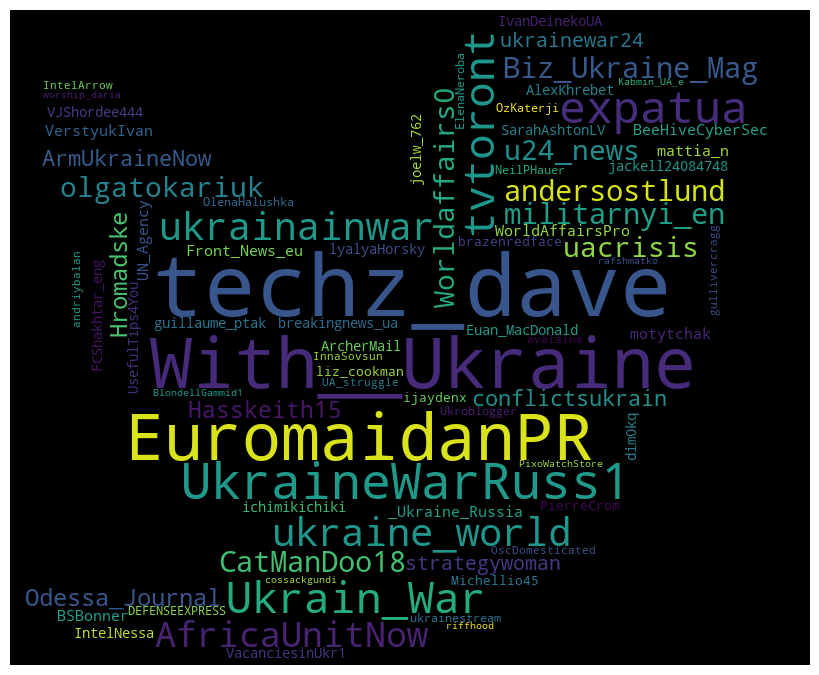

In [39]:
#Word Cloud of User who has more than 1000 Followers
mask = np.array(Image.open('twitter.png'))
word_ls = []
for val in df.Username[df['Follower Count']  >= 1000]:
    word_ls.append(val)

word_could_dict = Counter(word_ls)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',mask=mask,
                #stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

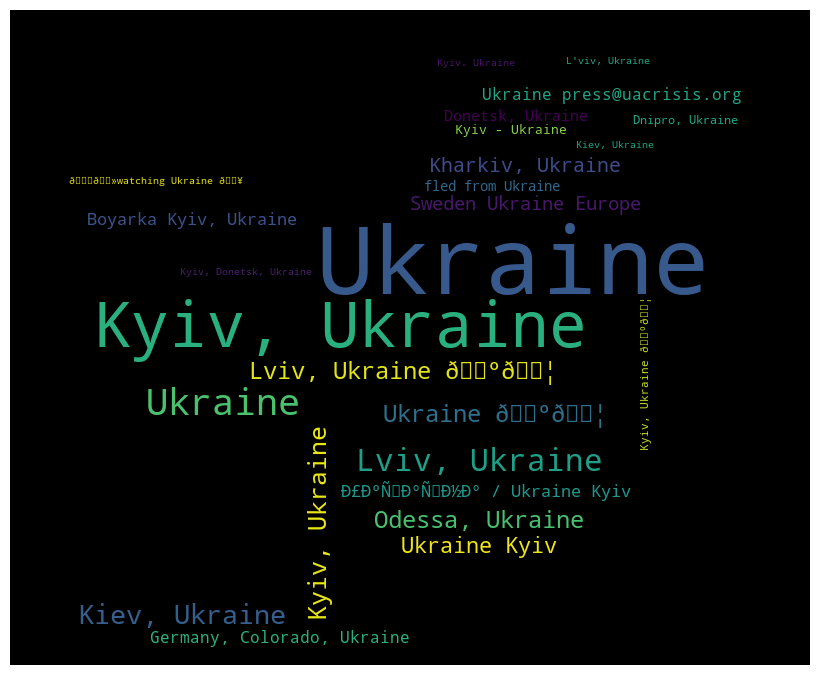

In [40]:
# Locations where the Sentiment of the Tweets is Negative
word_ls = []
for val in df.location[df.sentiment_nltk == 'Negative']:
    word_ls.append(val)

word_could_dict = Counter(word_ls)
#print(word_could_dict)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',mask=mask,
                #stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
import gensim
#from gensim.utils import simple_preprocess
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import spacy
import gensim.corpora as corpora

In [7]:
# clean_text takes in a pd.Series and removes special characters, stopwords, etc
def clean_text_nltk(pd_column):
    stop_words = list(set(stopwords.words('english')))  #use nltk stopwords
    clean = []
    for i in pd_column:
        i = i.lower()  #turn to lower case
        #print(i)
    
        #preprocess to split the words
        #re.split() has problem with '-' if no space between words, so first do i.split('-')
        i = i.split('-')
        i = ' '.join(i)
        i = i.split()
        #print(i)
    
        split_sent2 = []
        
        #remove stopwords and special characters
        for word in i:
            
            new_word = []
            if word not in stop_words and word[0]!='@' and word[0:4] != 'http' and word[0]!='#':
            #check each word to remove stop words, @username, website, hash-tag

                for letter in word:  #check each letter in word to remove special characters
                    if letter.isalpha(): #or letter.isdigit():
                        new_word.append(letter)
                    else:
                        pass
                word2 = ''.join(new_word)
                #print(word2)
                
                if word2 in stop_words or len(word2) < 3: #check stopwords again
                    pass
                else:
                    split_sent2.append(word2)
            else:
                pass
            
        #print(split_sent2)
        
        sent2 = ' '.join(split_sent2)
        clean.append(sent2)
    
    #print(clean[0:10])
    return(clean)

In [8]:
test = clean_text_nltk(df['Text'])
test[0:5]

['thank supporting ukraine ðððð',
 'friends ukraine countries protests please claim government close sky cant without request people democracy works like',
 'ukrainian grad mlrs firing russian positions via ukraine war today russia',
 'need fighter jets anti aircraft systems let ukraine lose war',
 'ambushed russian military convoy via ukraine war today russia']

In [9]:
# Tokenization, input is pd.Series with full sentences
from nltk.tokenize import sent_tokenize, word_tokenize

def nltk_tokenizer(pd_column):
    tokenized = []
    for i in pd_column:
        word_tokens = word_tokenize(i)
        tokenized.append(word_tokens)
    return tokenized

In [10]:
df_tokenized = pd.Series(nltk_tokenizer(test))
df_tokenized.head()

0                   [thank, supporting, ukraine, ðððð]
1    [friends, ukraine, countries, protests, please...
2    [ukrainian, grad, mlrs, firing, russian, posit...
3    [need, fighter, jets, anti, aircraft, systems,...
4    [ambushed, russian, military, convoy, via, ukr...
dtype: object

In [11]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)

In [12]:
df['Clean Text'] = clean_text_nltk(df['Text'])
df['Tokens'] = pd.Series(nltk_tokenizer(test))

In [13]:
df.head()

,Unnamed: 0,Datetime,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,sentiment_nltk,Clean Text,Tokens
0,52,2022-03-14 23:59:46+00:00,@franch_laura Thank you for supporting our Ukraine ðððð»,litsarkisian,Ukraine,1,0,0,en,Twitter for iPhone,1243,25,Positive,thank supporting ukraine ðððð,"[thank, supporting, ukraine, ðððð]"
1,236,2022-03-14 23:59:04+00:00,"To all friends of Ukraine, in all countries: go to protests! Please claim your government to close the sky, they can't do this without the request of their people! Democracy works like that!\n\n#UkraineWar #CloseTheSky #UkraineRussiaWar #StopPutin #Ukrainian https://t.co/bR2nSQUi7e",goldraga,"Kharkiv, Ukraine",0,1,2,en,Twitter Web App,6,18,Positive,friends ukraine countries protests please claim government close sky cant without request people democracy works like,"[friends, ukraine, countries, protests, please, claim, government, close, sky, cant, without, request, people, democracy, works, like]"
2,619,2022-03-14 23:57:26+00:00,Ukrainian BM-21 Grad MLRS firing on Russian positions. https://t.co/oBiA5XtVlh via @YouTube Ukraine War today Russia #Kyiv #Mauripol #DonbassUkraine @Ukrainewartoday,Ukrainewartoday,Ukraine,0,0,0,en,Twitter Web App,278,159,Negative,ukrainian grad mlrs firing russian positions via ukraine war today russia,"[ukrainian, grad, mlrs, firing, russian, positions, via, ukraine, war, today, russia]"
3,693,2022-03-14 23:57:09+00:00,@AndrzejDuda @ZelenskyyUa We need fighter jets and anti-aircraft systems. Don't let Ukraine lose this war.,tethys1100,Ukraine,0,0,0,en,Twitter for Android,115,240,Negative,need fighter jets anti aircraft systems let ukraine lose war,"[need, fighter, jets, anti, aircraft, systems, let, ukraine, lose, war]"
4,704,2022-03-14 23:57:06+00:00,Ambushed Russian Military Convoy! https://t.co/5JIn2mhqyt via @YouTube Ukraine War today Russia #Ukrajina #rat #Ukrajna @Ukrainewartoday,Ukrainewartoday,Ukraine,0,0,1,en,Twitter Web App,278,159,Negative,ambushed russian military convoy via ukraine war today russia,"[ambushed, russian, military, convoy, via, ukraine, war, today, russia]"


In [15]:
# First thing before using countVectorizer and TF-IDF, need to flat to a single list the cleaned sentences
def flat(lis):
    flatList = []
    # Iterate with outer list
    for element in lis:
        if type(element) is list:
            # Check if type is list than iterate through the sublist
            for item in element:
                flatList.append(item)
        else:
            flatList.append(element)
    return flatList

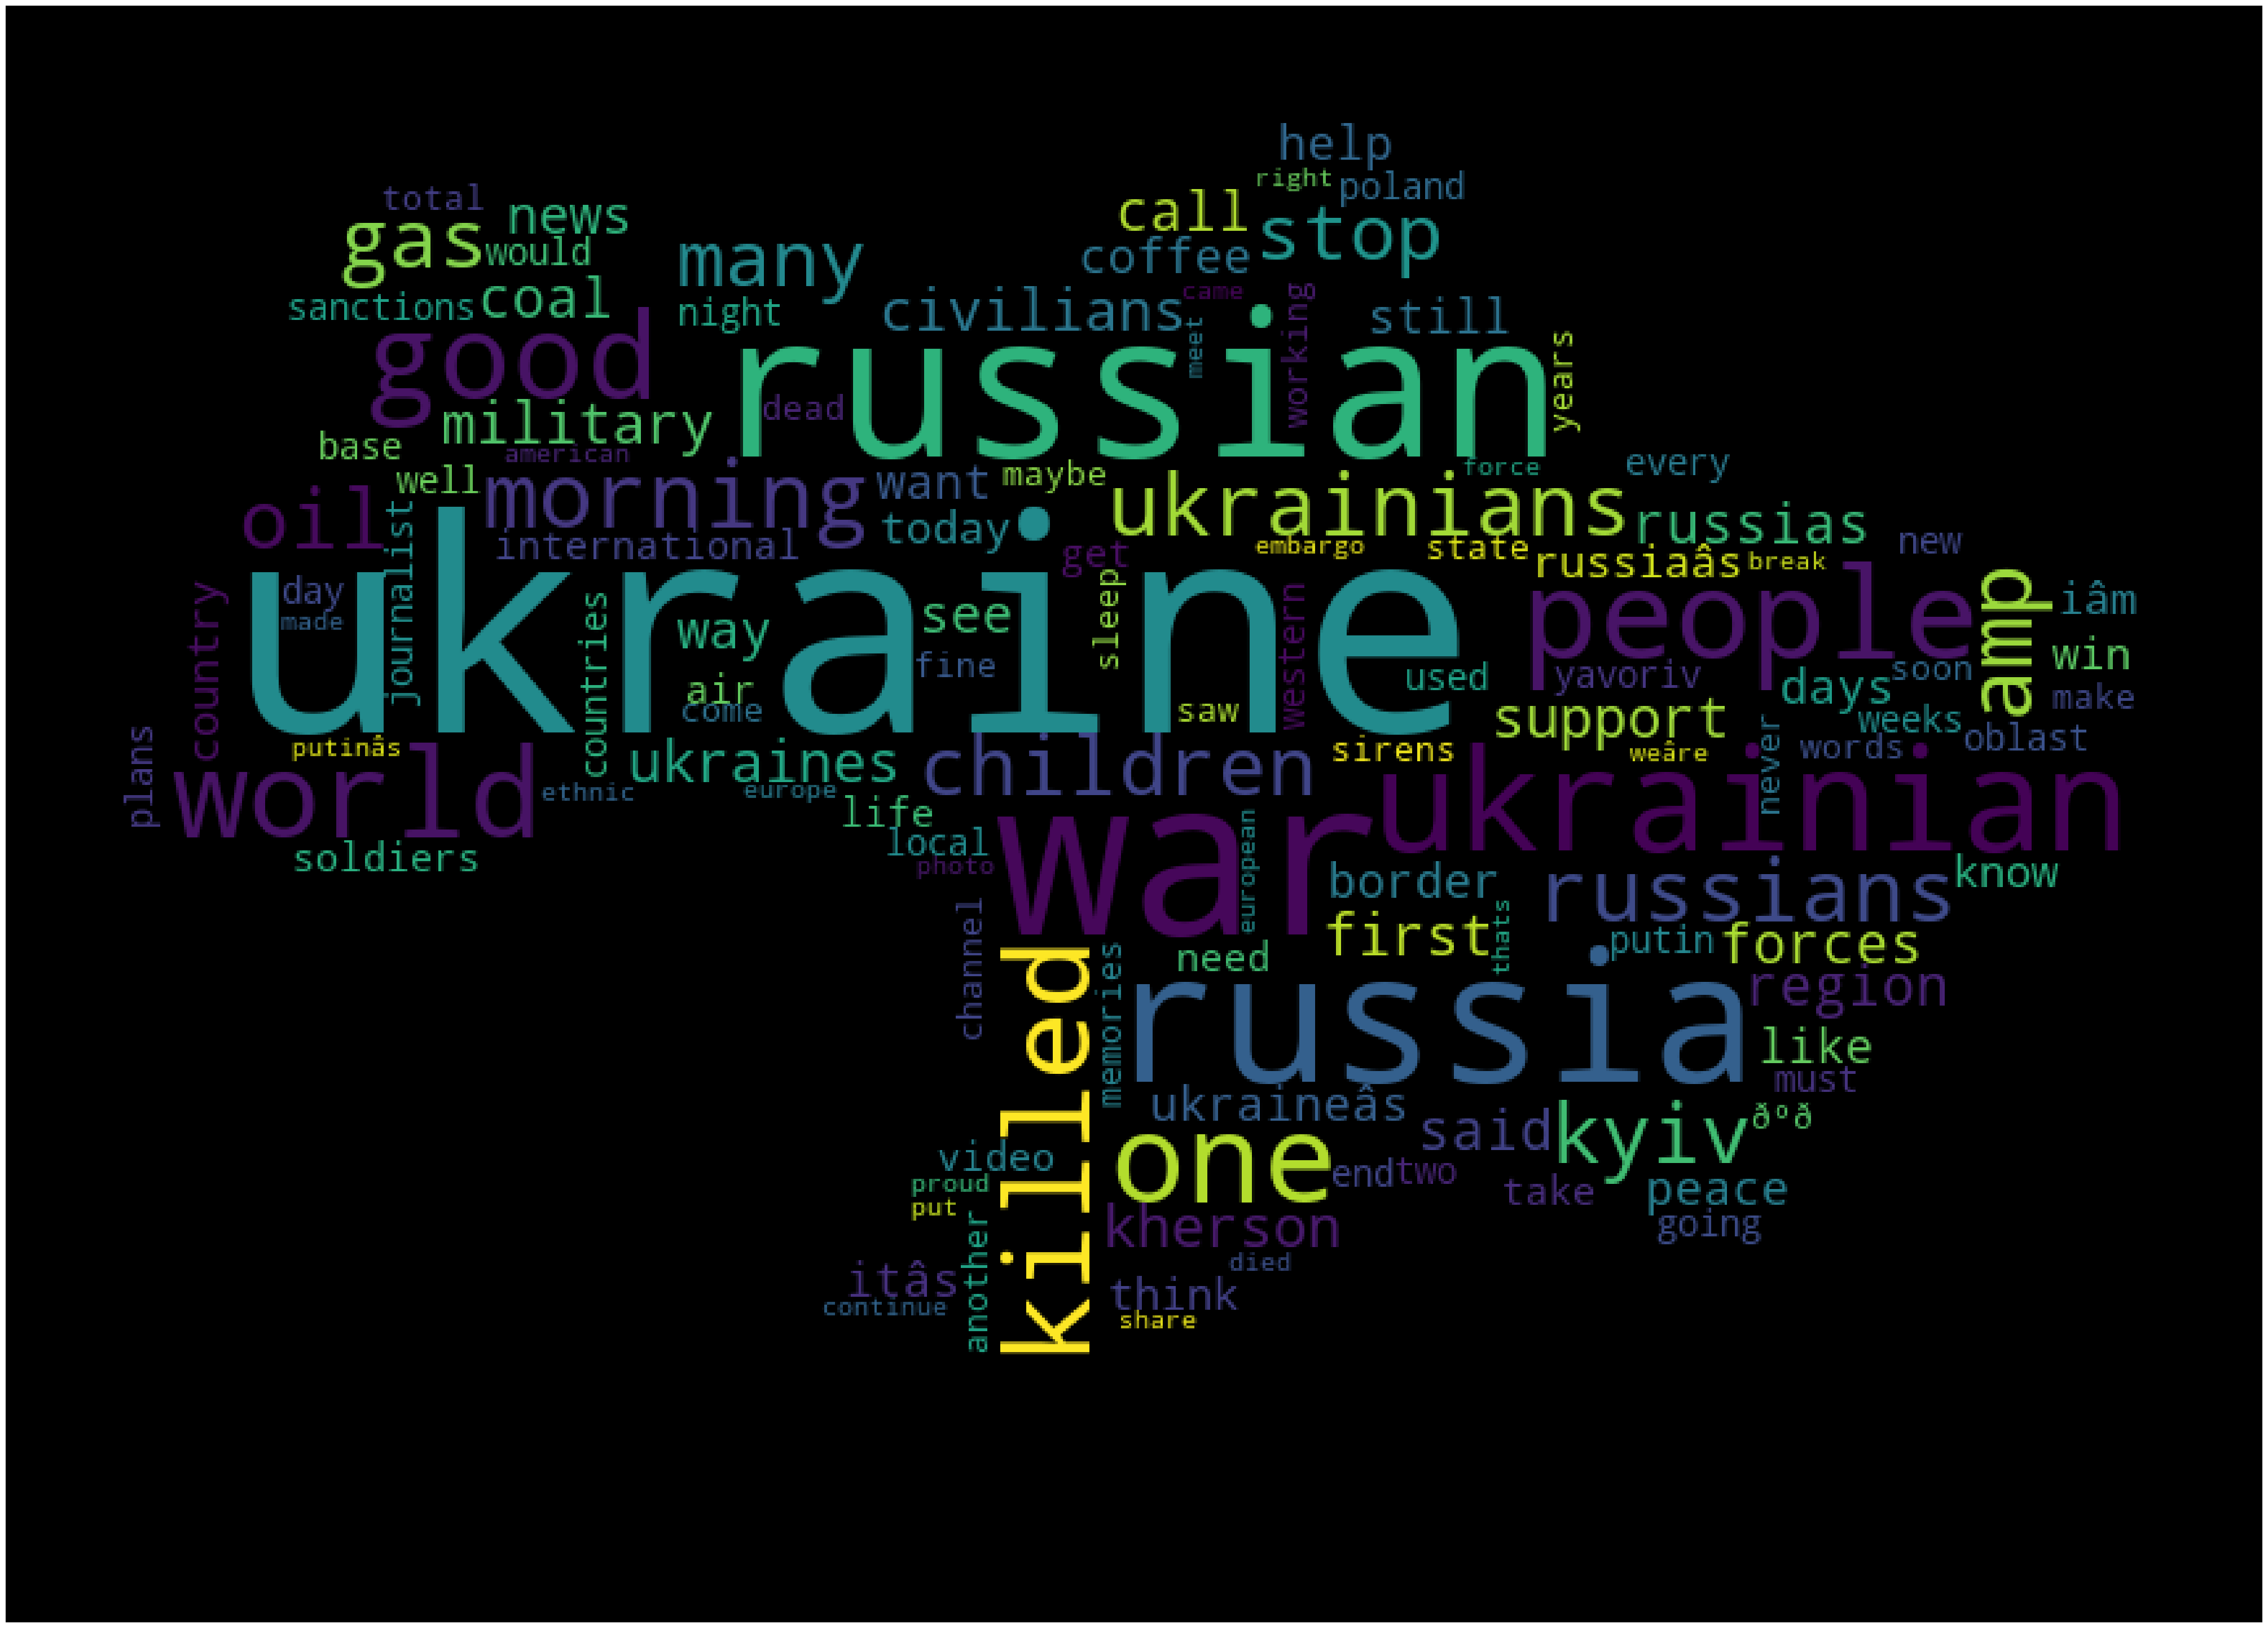

In [41]:
# Word Cloud:Important tokens in Tweets when the count of Likes are higher than 1,000 
mask = np.array(Image.open('ukraine.png'))
word_ls = []
for val in df['Tokens'][df['like count']  >= 1000]:
    word_ls.append(val)
    word_ls2= flat(word_ls)
word_could_dict = Counter(word_ls2)
wordcloud = WordCloud(width = 800, height = 700,
                background_color ='black', mask=mask,
                #stopwords = stopwords,
                min_font_size = 8).generate_from_frequencies(word_could_dict)

plt.figure(figsize = (40, 40), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()